In [ ]:
%matplotlib inline

import torch

from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
batch_size = 100

transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST('/tmp', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST('/tmp', train=False, download=True, transform=transform)


Extracting /tmp/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/MNIST/raw




Extracting /tmp/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/MNIST/raw




Extracting /tmp/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/MNIST/raw




Extracting /tmp/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
list(trainloader)[0]

In [ ]:
list(trainloader)[0][0][0][0]  # Одна картинка

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [ ]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

Labels:  tensor([4, 0, 8, 6, 6, 1, 5, 7, 9, 2, 4, 6, 4, 0, 7, 3, 9, 9, 0, 0, 5, 3, 4, 3,
        9, 7, 2, 9, 0, 8, 1, 7, 8, 6, 9, 4, 1, 0, 8, 9, 8, 1, 2, 5, 3, 8, 0, 9,
        8, 8, 1, 2, 8, 5, 7, 4, 8, 8, 4, 5, 5, 7, 7, 8, 1, 0, 5, 7, 3, 4, 4, 5,
        0, 3, 0, 4, 5, 3, 9, 6, 3, 2, 6, 3, 9, 0, 6, 7, 8, 2, 1, 0, 1, 4, 4, 3,
        4, 7, 8, 5])
Batch shape:  torch.Size([100, 1, 28, 28])


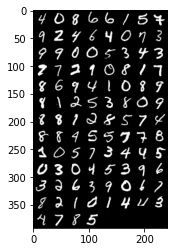

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)

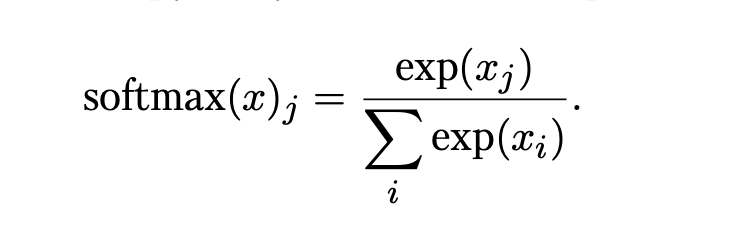

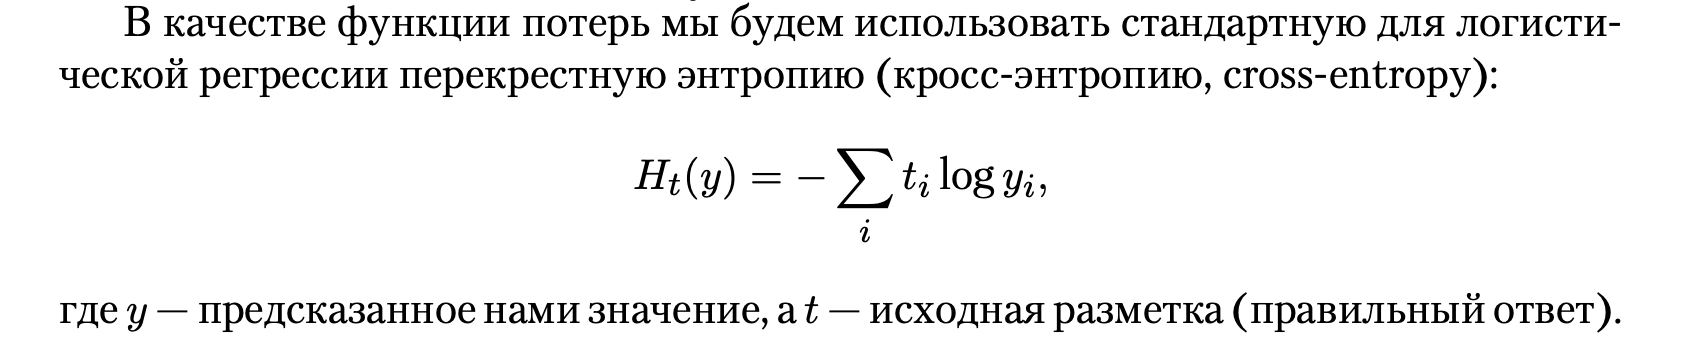

In [ ]:
class SequentialMNIST(nn.Module):
    def __init__(self):
        super(SequentialMNIST, self).__init__()
        self.linear1 = nn.Linear(28*28, 10)

    def forward(self, x):
        y_pred = F.softmax(self.linear1(x.view(batch_size, -1)))
        return y_pred

In [ ]:
model = SequentialMNIST()
model

SequentialMNIST(
  (linear1): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
def train(model, trainloader, criterion, optimizer, n_epochs=500):
    for t in range(n_epochs):
        for i, data in enumerate(trainloader):
            inputs, labels = data
            inputs, labels = Variable(inputs), Variable(labels)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels) 
            loss.backward() 
            optimizer.step()

            print(t, i, loss)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-6)

train(model, trainloader, criterion, optimizer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  import sys


Выходные данные были обрезаны до нескольких последних строк (5000).
491 400 tensor(1.5906, grad_fn=<NllLossBackward>)
491 401 tensor(1.6581, grad_fn=<NllLossBackward>)
491 402 tensor(1.6087, grad_fn=<NllLossBackward>)
491 403 tensor(1.6242, grad_fn=<NllLossBackward>)
491 404 tensor(1.6435, grad_fn=<NllLossBackward>)
491 405 tensor(1.6052, grad_fn=<NllLossBackward>)
491 406 tensor(1.6815, grad_fn=<NllLossBackward>)
491 407 tensor(1.6615, grad_fn=<NllLossBackward>)
491 408 tensor(1.6796, grad_fn=<NllLossBackward>)
491 409 tensor(1.6636, grad_fn=<NllLossBackward>)
491 410 tensor(1.6826, grad_fn=<NllLossBackward>)
491 411 tensor(1.5990, grad_fn=<NllLossBackward>)
491 412 tensor(1.6402, grad_fn=<NllLossBackward>)
491 413 tensor(1.6260, grad_fn=<NllLossBackward>)
491 414 tensor(1.6376, grad_fn=<NllLossBackward>)
491 415 tensor(1.6421, grad_fn=<NllLossBackward>)
491 416 tensor(1.6262, grad_fn=<NllLossBackward>)
491 417 tensor(1.6405, grad_fn=<NllLossBackward>)
491 418 tensor(1.6411, grad_fn=<

In [ ]:
def predict(model, images):
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    return predicted

Prediction:  tensor([7, 2, 1, 0, 4, 1, 4, 9, 4, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 3, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 7, 1, 7, 3, 7, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4,
        1, 7, 6, 9])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  import sys


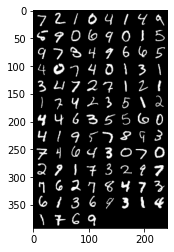

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

show_batch(images)
print('Prediction: ', predict(model, images))

In [ ]:
def test(model, testloader, n):
    correct = 0
    for data in testloader:
        inputs, labels = data
        pred = predict(model, inputs)
        correct += (pred == labels).sum()
    return 100 * correct / n

In [ ]:
print('Accuracy: ', test(model, testloader, len(testset)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  import sys


Accuracy:  tensor(89.0200)


In [ ]:
 list(testloader)

[[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          ...,
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,

In [ ]:
from google.colab import files 
uploaded = files.upload() 

Saving SmartSelect_20210715-220107_Sams.jpg to SmartSelect_20210715-220107_Sams.jpg


In [ ]:
import numpy
from PIL import Image


def get_image(image_path):
    """Get a numpy array of an image so that one can access values[x][y]."""
    image = Image.open(image_path, "r")
    width, height = image.size
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = numpy.array(pixel_values).reshape((width, height, channels))
    return pixel_values


image = get_image("/content/SmartSelect_20210715-220107_Sams.jpg")


print(image.shape)
image

(23, 23, 1)


array([[[  4],
        [  4],
        [  4],
        [  4],
        [  4],
        [  4],
        [  4],
        [  4],
        [  6],
        [  7],
        [  6],
        [  5],
        [  3],
        [  0],
        [  0],
        [  0],
        [  1],
        [  5],
        [  4],
        [  4],
        [  4],
        [  4],
        [  4]],

       [[  3],
        [  4],
        [  4],
        [  4],
        [  4],
        [  4],
        [  4],
        [  4],
        [  2],
        [  0],
        [  0],
        [  0],
        [  8],
        [ 23],
        [ 43],
        [ 66],
        [ 89],
        [ 41],
        [  0],
        [  5],
        [  4],
        [  4],
        [  4]],

       [[  4],
        [  4],
        [  4],
        [  4],
        [  4],
        [  4],
        [  5],
        [  0],
        [ 49],
        [ 78],
        [ 80],
        [ 89],
        [ 89],
        [ 82],
        [ 66],
        [ 41],
        [ 15],
        [  4],
        [  4],
        [  4],
      

In [ ]:
predict(model, demo_img)

In [ ]:
import numpy as np
from PIL import Image
from torchvision import transforms

trans = transforms.Compose([transforms.ToTensor()])

demo = Image.open('/content/SmartSelect_20210715-220107_Sams.jpg') 
demo_img = trans(demo)
#demo_array = np.moveaxis(demo_img.numpy()*255, 0, -1)
#print(Image.fromarray(demo_array.astype(np.uint8)))

In [ ]:
demo_img.add()

tensor([[[0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
          0.0235, 0.0275, 0.0235, 0.0196, 0.0118, 0.0000, 0.0000, 0.0000,
          0.0039, 0.0196, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157],
         [0.0118, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157,
          0.0078, 0.0000, 0.0000, 0.0000, 0.0314, 0.0902, 0.1686, 0.2588,
          0.3490, 0.1608, 0.0000, 0.0196, 0.0157, 0.0157, 0.0157],
         [0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0196, 0.0000,
          0.1922, 0.3059, 0.3137, 0.3490, 0.3490, 0.3216, 0.2588, 0.1608,
          0.0588, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157],
         [0.0157, 0.0118, 0.0157, 0.0157, 0.0157, 0.0157, 0.0235, 0.0000,
          0.5686, 0.2549, 0.0824, 0.0588, 0.0078, 0.0000, 0.0000, 0.0000,
          0.0039, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0157],
         [0.0157, 0.0157, 0.0157, 0.0157, 0.0157, 0.0196, 0.0000, 0.0784,
          0.5529, 0.0000, 0.0000, 0.0078, 0.0157, 0.0235, 0.0235, 

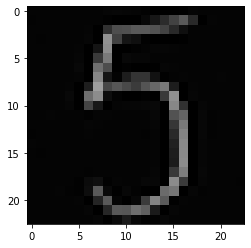

In [ ]:
show_batch(demo_img)